# Fashion Network
- 소유하고 있는 옷의 상호연결성 확인

In [2]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
up=['CRDGN','MTM','HOOD','SHT','KNIT']
down=['SKBLJ','BLJ','WISLAC']
clothes=up+down
weight_list=[[1,0,0],
             [0,1,0],
             [0,1,0],
             [0,0,1],
             [1,0,1]]
initdataf=pd.DataFrame(index=up,columns=down,data=weight_list)
initdataf

,SKBLJ,BLJ,WISLAC
CRDGN,1,0,0
MTM,0,1,0
HOOD,0,1,0
SHT,0,0,1
KNIT,1,0,1


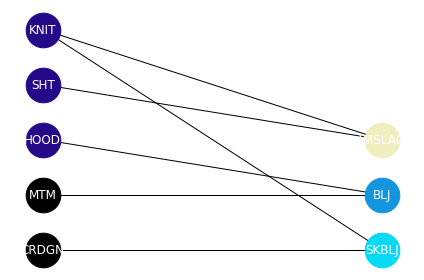

In [37]:
# 봄 옷
## initial data
G=nx.Graph()


## 좌표 설정
pos={}
a=0
b=0
for i in clothes:
    if i in up:
        pos[i]=(0,a)
        a+=1
    else:
        pos[i]=(1,b)
        b+=1
## node plot
def draw_node_custom(x,y): #x=Clothing list, y=colorcode
    nodesize=1200
    nx.draw_networkx_nodes(G,pos,nodelist=x,node_color=y,node_size=nodesize)
draw_node_custom(['CRDGN','MTM'],"#000000")
draw_node_custom(['SHT','KNIT','HOOD'],"#240989")
draw_node_custom(['SKBLJ'],"#08D9F2")
draw_node_custom(['BLJ'],"#1496DF")
draw_node_custom(['WISLAC'],"#F0EDBE")

## 엣지 설정
edgelist=[]
for i in up:
    for j in down:
        if initdataf.loc[i][j]==1:
            edgelist.append((i,j))

nx.draw_networkx_edges(G,pos,edgelist=edgelist,edge_color='black')

## 라벨 설정
labels={}
for i in clothes:
    labels[i]=i
nx.draw_networkx_labels(G, pos, labels, font_size=12, font_color="white")

## graph 그리기
plt.tight_layout()
plt.axis("off")
plt.show()